## **TextRank 演算法**



*   基於圖形建立的字詞間關係
*   某字詞、和其他位置相近字詞，有很強的連結。

> 1.   d : 特定點到任一點的機率
> 2.   Out(Vj): 有連結的個數
> 3.   h(Vj): TextRank分數



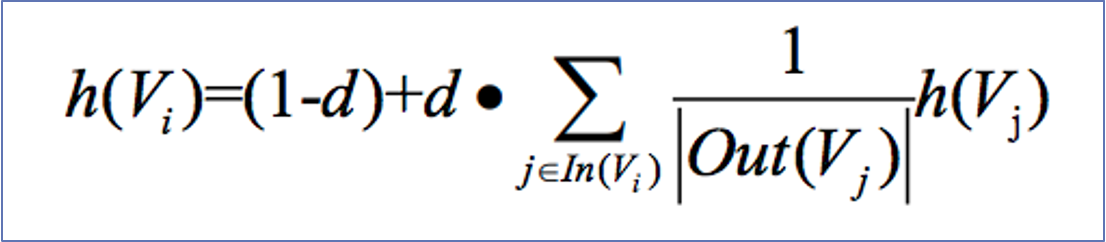


In [ ]:
# get Stanford NLP package and stuffs
!pip install stanfordcorenlp

#!wget http://140.119.164.107/matytest/stanford-corenlp-full-2018-02-27.tgz



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# If you have .tar, then:
#!tar xvf stanford-corenlp-full-2018-02-27.tar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# my drive : https://drive.google.com/file/d/1xlnAA7y8F4Gr6Evb5Dzn37YlmsvbvTlr/view?usp=share_link
!cp -R "/content/drive/MyDrive/Colab Notebooks/人工智慧技術與網路意向分析/Week 6/stanford-corenlp-full-2018-02-27 2" .

In [ ]:
!ls -al

total 24
drwxr-xr-x 1 root root 4096 Mar 20 07:59  .
drwxr-xr-x 1 root root 4096 Mar 20 07:22  ..
drwxr-xr-x 4 root root 4096 Mar 16 13:44  .config
drwx------ 6 root root 4096 Mar 20 07:22  drive
drwxr-xr-x 1 root root 4096 Mar 16 13:45  sample_data
drwx------ 5 root root 4096 Mar 20 08:00 'stanford-corenlp-full-2018-02-27 2'


In [ ]:
!tar xzvf stanford-corenlp-full-2018-02-27.tgz

tar (child): stanford-corenlp-full-2018-02-27.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


---

以下是處理中文區塊

這次用這篇：https://ent.ltn.com.tw/news/breakingnews/4238532

In [ ]:
# 選一篇中文新聞來玩玩
Title_LibTime = 'Rosé到台灣發文了！BLACKPINK下榻酒店「房間藏粉紅驚喜」讓她融化了'
Content_LibTime = '''〔記者廖俐惠／綜合報導〕南韓女子天團BLACKPINK今（18）日中午抵達台灣，成員們入住一晚最貴要價25萬元的高雄洲際酒店，現場已有許多粉絲在外守候。而成員Rosé也在IG分享床鋪的照片，上面有一隻非常可愛的粉色米飛兔，似乎也融化了女神的心。

Rosé稍早在個人IG分享下榻酒店的照片，只見兩個枕頭中間有一隻很可愛的粉色米飛兔，還圍著一條紅色圍巾，Rosé也附了一個小愛心，似乎也覺得兔子娃娃很可愛。事實上，BLACKPINK下榻的洲際酒店最近推出「米飛兔小幸運」住房專案，入住會送出限量版洲際圍巾米飛兔1隻，不過據了解，一般房客只會拿到白色的米飛兔，BLACKPINK成員的粉色兔子很可能是飯店特別準備的。
BLACKPINK下榻酒店是高雄5星級飯店，藝人王思佳到高雄拍攝「貴婦行程」影片時，就是入住這間高雄洲際酒店，不但可以欣賞一望無際的港都美景，房間內還有智能管家，聲控方式控制電視以及燈光，還有下午茶等眾多服務。據網紅Nissie陳妮絲透露，總統套房一晚要價25萬9千元。
'''

In [ ]:
#開始使用 stanfordcorenlp
from stanfordcorenlp import StanfordCoreNLP

# 設定 CoreNLP 客戶端
nlp = StanfordCoreNLP('./stanford-corenlp-full-2018-02-27 2', lang='zh', timeout=30000)

#########################################################
# 1) 先切字詞；
word_result = nlp.word_tokenize(Title_LibTime + Content_LibTime)

# check result
print(word_result)

['Rosé', '到', '台灣發', '文', '了', '！', 'BLACKPINK', '下榻', '酒店', '「', '房間', '藏', '粉紅驚喜', '」', '讓', '她', '融化', '了', '〔', '記者', '廖俐惠／綜合報導', '〕', '南韓', '女子', '天團', 'BLACKPINK', '今', '（', '18', '）', '日', '中午', '抵', '達', '台灣', '，', '成員們', '入住', '一', '晚', '最貴', '要', '價', '25', '萬元', '的', '高雄', '洲際酒店', '，', '現場', '已', '有', '許', '多', '粉絲在外', '守候', '。', '而', '成', '員', 'Rosé', '也', '在', 'IG', '分享', '床鋪', '的', '照片', '，', '上面', '有', '一', '隻', '非常', '可愛', '的', '粉色', '米飛兔', '，', '似乎', '也', '融化', '了', '女神', '的', '心', '。', 'Rosé', '稍早', '在', '個人', 'IG', '分享', '下榻', '酒店', '的', '照片', '，', '只見兩個', '枕', '頭中間', '有', '一', '隻', '很', '可愛', '的', '粉色', '米飛兔', '，', '還圍', '著', '一', '條紅', '色', '圍巾', '，', 'Rosé', '也', '附', '了', '一', '個', '小', '愛心', '，', '似乎', '也', '覺得', '兔子', '娃娃', '很', '可愛', '。', '事實', '上', '，', 'BLACKPINK', '下榻', '的', '洲際酒店', '最近', '推出', '「', '米飛兔', '小', '幸運', '」', '住房', '專案', '，', '入住', '會', '送出', '限量', '版', '洲', '際圍', '巾米飛兔', '1', '隻', '，', '不', '過據', '了解', '，', '一般', '房客', '只', '會', '拿到', '白色', '的

In [ ]:
# 1.1) 停止詞過濾？
# Maty note: 試著先解決標點符號就好
str_ann = '[〔〕；，、。：「『《（」』》）？]|\[.*?\]'
def filterSentence_v2(str_sent):
    # keep only word
    #step-1: filter 
    str_Filtered = re.sub(str_ann, ' ', str_sent)
    print(str_Filtered)
    return str_Filtered


In [ ]:
############################################################################################
#### 練習 TextRank 演算法
#### Utilities
import re
import networkx as nx
import itertools
import editdistance


def filterSentence_v2(str_sent):
    # keep only word
    #step-1: filter 
    str_Filtered = re.sub('[〔〕；，、。：「『《（」』》）？]|\[.*?\]', ' ', str_sent)
    print(str_Filtered)
    return str_Filtered

def filter_for_tags(tagged, tags=['NN', 'JJ', 'NNP']):
    """Apply syntactic filters based on POS tags."""
    return [item for item in tagged if item[1] in tags]

def build_graph(nodes):
    """Return a networkx graph instance.
    :param nodes: List of hashables that represent the nodes of a graph.
    """
    gr = nx.Graph()  # initialize an undirected graph
    gr.add_nodes_from(nodes)
    nodePairs = list(itertools.combinations(nodes, 4))  # 結合n個不重複的nodes的所有組合，目前 n = 4

    # add edges to the graph (weighted by Levenshtein distance)
    for pair in nodePairs:
        firstString = pair[0]
        secondString = pair[1]
        levDistance = editdistance.eval(firstString, secondString)
        gr.add_edge(firstString, secondString, weight=levDistance)

    return gr

In [ ]:
##################################################################################
# 開始計算 textrank

node_list = []
for word in word_result:
    if word not in str_ann:
        node_list.append(word)

#print(node_list)

graph = build_graph(node_list)

# 把資料以 pagerank 演算法計算權重
calculated_page_rank = nx.pagerank(graph, weight='weight')

keyphrases = sorted(calculated_page_rank, key=calculated_page_rank.get,
                        reverse=True)

print('依權重排序TextRank', '-'*50)
#print(keyphrases)
for key in keyphrases:
    print(f"({key} => {calculated_page_rank[key]})", end=' ')



依權重排序TextRank --------------------------------------------------
(BLACKPINK => 0.02213771006761734) (廖俐惠／綜合報導 => 0.0198136012630855) (Nissie => 0.01514768162056049) (特別準備 => 0.010538900162360022) (Rosé => 0.010524829005081658) (只見兩個 => 0.010507244637255045) (巾米飛兔 => 0.01049431065131164) (粉紅驚喜 => 0.01049344822248294) (粉絲在外 => 0.010493097828880903) (房間內還 => 0.010461124247286678) (洲際酒店 => 0.010429847484030436) (王思佳 => 0.008343245998555234) (陳妮絲 => 0.008343245998555234) (據網紅 => 0.008327770726050341) (台灣發 => 0.00831229720506665) (米飛兔 => 0.008299759697718949) (頭中間 => 0.008296793125462174) (成員們 => 0.008280606940106195) (融化 => 0.006251725142573011) (記者 => 0.006251725142573011) (南韓 => 0.006251725142573011) (天團 => 0.006251725142573011) (入住 => 0.006251725142573011) (高雄 => 0.006251725142573011) (現場 => 0.006251725142573011) (守候 => 0.006251725142573011) (分享 => 0.006251725142573011) (床鋪 => 0.006251725142573011) (非常 => 0.006251725142573011) (似乎 => 0.006251725142573011) (稍早 => 0.006251725142573011) (圍巾

## Quiz - 3 : 自行尋找一篇新聞，列出 TextRank 前十名的關鍵字（最好先過濾停止詞）。

In [ ]:
# Quiz-3 : 要如何做呢？是否再重覆一次以上步驟？